In [ ]:
!pip install --upgrade pip
!pip install fosforml numpy pandas matplotlib scikit-learn seaborn python-dateutil
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install fosforml 
!pip install fosforio
!pip install -U cloudpickle

In [1]:
from snowflake.snowpark import Session

# Data Science Libs
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from fosforio import snowflake

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [3]:
from snowflake.snowpark import Session
from snowflake.connector.pandas_tools import write_pandas

# Data Science Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

In [4]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

In [5]:
df = 'FRAUD_DETECTION_ANALY_MASTER_TABLE'

In [6]:
sf_df = my_session.sql("select * from {}".format(df))

In [7]:
import pandas as pd
fraud_df = sf_df.to_pandas()

In [9]:
Fraud_Detection = fraud_df.copy()

In [11]:
Fraud_Detection.columns

Index(['CREDIT_LIMIT', 'ACCOUNT_OPENING_DATE', 'LAST_LOGIN',
       'CUSTOMER_SEGMENT', 'ACCOUNT_TYPE', 'DEVICE_USED', 'NAME', 'GENDER',
       'DOB', 'AGE', 'CUSTOMER_ID', 'AGE_GROUP', 'AGE_OF_ACCOUNT',
       'FREQUENCY_OF_TRANSACTIONS', 'CUSTOMER_LOYALTY_SCORE',
       'NUMBER_OF_REFUNDS', 'NUMBER_OF_CHARGEBACKS',
       'CREDIT_UTILIZATION_RATIO', 'CHANGE_IN_SPENDING_BEHAVIOR',
       'TRANSACTION_VELOCITY', 'CUSTOMER_LOYALTY_CATEGORY',
       'TIME_SINCE_LAST_TRANSACTION', 'TRANSACTION_ID', 'TIME',
       'TRANSACTION_AMOUNT', 'MERCHANT_RISK_SCORE',
       'DISTANCE_FROM_HOME_ADDRESS', 'DISTANCE_FROM_LAST_TRANSACTION',
       'TRANSACTION_DATE', 'TRANSACTION_TYPE', 'MERCHANT_CATEGORY',
       'PAYMENT_METHOD', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'TRANSACTION_STATUS',
       'COUNTY', 'STATE', 'CITY', 'YEAR', 'QUARTER', 'MONTH', 'ANOMALY_SCORE',
       'FRAUD_INDICATOR', 'SUSPICIOUS_FLAG', 'PREVIOUS_FRAUD_REPORTS',
       'CROSS_BORDER_TRANSACTION_INDICATOR', 'NEW_DEVICE_INDICATOR',
    

In [13]:
### changing Incident date into datetime format
Fraud_Detection['TRANSACTION_DATE']=pd.to_datetime(Fraud_Detection['TRANSACTION_DATE'],format='%Y-%m-%d')

### changing auto_year date into datetime format
Fraud_Detection['YEAR']=pd.to_datetime(Fraud_Detection['YEAR'],format='%Y')

In [14]:
### Intialize "count" column

Fraud_Detection['count']=1

In [19]:
#plt.figure(figsize=[5,4])
fig = px.pie(Fraud_Detection,names='FRAUD_INDICATOR')
fig.write_html("data/EDA/Fraud_Detection_Pie_Distribution.html")

In [21]:
groupdf_is = Fraud_Detection.groupby(by=['GENDER', 'FRAUD_INDICATOR']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is = groupdf_is[['GENDER', 'FRAUD_INDICATOR', 'count']]
groupdf_is.head()

,GENDER,FRAUD_INDICATOR,count
0,Female,0,141546
1,Female,1,8144
2,Male,0,142331
3,Male,1,7979


In [22]:
fig=px.bar(groupdf_is,x='GENDER',y='count',color='FRAUD_INDICATOR',text='count',pattern_shape_sequence=['|','/'],pattern_shape='FRAUD_INDICATOR')
fig.write_html("data/EDA/Gender_vs_Fraudreported.html")

In [24]:
groupdf_uu = Fraud_Detection.groupby(by=['CREDIT_LIMIT', 'FRAUD_INDICATOR']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu = groupdf_uu[['CREDIT_LIMIT', 'FRAUD_INDICATOR', 'count']]
groupdf_uu.head(3)


,CREDIT_LIMIT,FRAUD_INDICATOR,count
0,5000,0,35322
1,5000,1,2048
2,10000,0,35442


In [25]:
fig=px.bar(groupdf_uu,x='CREDIT_LIMIT',y='count',color='FRAUD_INDICATOR',text='count')
fig.write_html("data/EDA/creditLimit_vs_Fraudreported.html")

In [28]:
groupdf_el = Fraud_Detection.groupby(by=['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_INDICATOR']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el = groupdf_el[['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_INDICATOR', 'count']]
groupdf_el.head()

,CUSTOMER_LOYALTY_CATEGORY,FRAUD_INDICATOR,count
0,High Loyalty,0,71399
1,High Loyalty,1,4114
2,Low Loyalty,0,72395
3,Low Loyalty,1,3955
4,Medium Loyalty,0,70548


In [31]:
groupdf_ic = Fraud_Detection.groupby(by=['CUSTOMER_SEGMENT', 'FRAUD_FLAG']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic = groupdf_ic[['CUSTOMER_SEGMENT', 'FRAUD_FLAG', 'count']]
groupdf_ic.head()


,CUSTOMER_SEGMENT,FRAUD_FLAG,count
0,Business,No,70790
1,Business,Yes,4021
2,Individual,No,71129
3,Individual,Yes,4106
4,Senior,No,70979


In [32]:
fig=px.bar(groupdf_ic, x='CUSTOMER_SEGMENT', y='count', color='FRAUD_FLAG', text='count', title='Number of Claims by Different Customer Segments')
fig.write_html("data/EDA/CustomerSegment_vs_FraudClaims.html")


In [34]:
groupdf_h = Fraud_Detection.groupby(by=['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_FLAG']).count()
groupdf_h.reset_index(inplace=True)
groupdf_h = groupdf_h[['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_FLAG', 'count']]
groupdf_h.head()


,CUSTOMER_LOYALTY_CATEGORY,FRAUD_FLAG,count
0,High Loyalty,No,71399
1,High Loyalty,Yes,4114
2,Low Loyalty,No,72395
3,Low Loyalty,Yes,3955
4,Medium Loyalty,No,70548


In [35]:
fig=px.bar(groupdf_h,x='CUSTOMER_LOYALTY_CATEGORY',y='count',color='FRAUD_FLAG',text='count',title="loyalty Wise claim")
fig.write_html("data/EDA/customerloyaltycatgy_vs_Fraudreported.html")

In [36]:
groupdf_rl = Fraud_Detection.groupby(by=['AGE_GROUP', 'FRAUD_FLAG']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl = groupdf_rl[['AGE_GROUP', 'FRAUD_FLAG', 'count']]
groupdf_rl.head()


,AGE_GROUP,FRAUD_FLAG,count
0,Adult,No,67720
1,Adult,Yes,3830
2,Senior,No,136736
3,Senior,Yes,7804
4,Teenager,No,2650


In [37]:
fig=px.bar(groupdf_rl,x='AGE_GROUP',y='count',color='FRAUD_FLAG',text='count')
fig.write_html("data/EDA/AgeGroup_vs_Fraudreported.html")

In [40]:
groupdf_it=Fraud_Detection.groupby(by=['MERCHANT_CATEGORY','FRAUD_FLAG']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['MERCHANT_CATEGORY','FRAUD_FLAG','count']]
groupdf_it.head()

,MERCHANT_CATEGORY,FRAUD_FLAG,count
0,Apparel,No,35700
1,Apparel,Yes,1991
2,Electronics,No,35604
3,Electronics,Yes,2012
4,Entertainment,No,35409


In [42]:
fig=px.bar(groupdf_it,x='MERCHANT_CATEGORY',y='count',color='FRAUD_FLAG',text='count',title="merchant category vs fraud flag")
fig.write_html("data/EDA/merchantcatg_vs_Fraudreported.html")

In [45]:
grp1 = Fraud_Detection.groupby(['CUSTOMER_SEGMENT'])['FRAUD_INDICATOR'].mean()
grp1 = pd.DataFrame(grp1)
grp1.reset_index(inplace=True)
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: 100 * x)
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: round(x, 2))
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: "{}{}".format(x, '%'))
grp1.rename(columns={'FRAUD_INDICATOR': 'Fraud percentage'}, inplace=True)
grp1.head(10)


,CUSTOMER_SEGMENT,Fraud percentage
0,Business,5.37%
1,Individual,5.46%
2,Senior,5.36%
3,Student,5.3%


In [46]:
fig=px.bar(grp1,x='CUSTOMER_SEGMENT',y='Fraud percentage',color='CUSTOMER_SEGMENT',log_y=True,title='Fraud percentage:segmet wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.write_html("data/EDA/segmentwise_vs_FraudPercentage.html")

In [48]:
grp2=Fraud_Detection.groupby(['DEVICE_USED'])['FRAUD_INDICATOR'].mean()
grp2=pd.DataFrame(grp2)
grp2.reset_index(inplace=True)
grp2['FRAUD_INDICATOR']=grp2['FRAUD_INDICATOR'].apply(lambda x: 100*x)
grp2['FRAUD_INDICATOR']=grp2['FRAUD_INDICATOR'].apply(lambda x: round(x,2))
grp2['FRAUD_INDICATOR'] = grp2['FRAUD_INDICATOR'].apply(lambda x: "{}{}".format(x,'%'))
grp2.rename(columns={'FRAUD_INDICATOR':'Fraud percentage'},inplace=True)
grp2.head()

,DEVICE_USED,Fraud percentage
0,Desktop,5.4%
1,Laptop,5.48%
2,Mobile,5.36%
3,Other,5.18%
4,Tablet,5.44%


In [49]:
fig=px.bar(grp2,x='DEVICE_USED',y='Fraud percentage',color='DEVICE_USED',log_y=True,title='Fraud percentage:Device used',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.write_html("data/EDA/DeviceUsed_vs_FraudPercentage.html")

In [51]:
fig = px.sunburst(Fraud_Detection, path=['DEVICE_USED', 'ACCOUNT_TYPE'])
fig.write_html("data/EDA/DeviceUsed_vs_Accounttype.html")


In [53]:
fig = px.treemap(Fraud_Detection, path=[px.Constant("All Device Type"), 'DEVICE_USED', 'ACCOUNT_TYPE'], values='count')
fig.write_html("data/EDA/TreeMap_DeviceType_vs_Accounttype.html")


In [56]:
claim_gender_edu=pd.pivot_table(data=Fraud_Detection,index='GENDER',columns='CUSTOMER_SEGMENT',values='FRAUD_INDICATOR')
claim_gender_edu

CUSTOMER_SEGMENT,Business,Individual,Senior,Student
GENDER,,,,
Female,0.053945,0.056077,0.053518,0.054072
Male,0.053554,0.053075,0.053708,0.051994


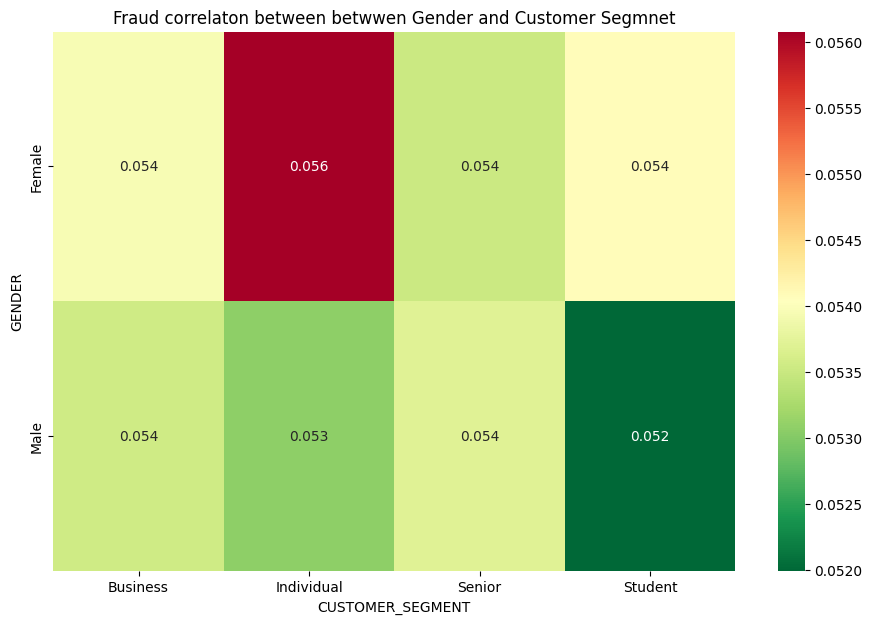

In [57]:
plt.figure(figsize=[11,7])
sns.heatmap(claim_gender_edu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen Gender and Customer Segmnet")
fig.write_html("data/EDA/corelation_gender_customersegment.html")